# Sample Analysis of OKCupid Data

All this in Python 2.7.

Jonathan Lu
3/24/2019

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# increase the width of the pandas dataframe to allow scrolling through all columns

pd.options.display.max_columns = 100

In [7]:
profile_df = pd.read_csv("profiles.csv")

In [8]:
print profile_df.shape[0], ""
print profile_df.shape[1], "Columns"
profile_df.head()

59946 
31 Columns


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Wow, lots of text! Let's take a look at the number of variables in each column.

In [9]:
profile_df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


Looks like the only numerical variables are age, height, income.

What are my columns?

See okcupid_codebook.txt for more detail.

In [10]:
print profile_df.columns.values

['age' 'body_type' 'diet' 'drinks' 'drugs' 'education' 'essay0' 'essay1'
 'essay2' 'essay3' 'essay4' 'essay5' 'essay6' 'essay7' 'essay8' 'essay9'
 'ethnicity' 'height' 'income' 'job' 'last_online' 'location' 'offspring'
 'orientation' 'pets' 'religion' 'sex' 'sign' 'smokes' 'speaks' 'status']


Why are there -1s in income? They indicate missing input. Let's remove it for now

In [11]:
print "Before shape", profile_df.shape

profile_df = profile_df[profile_df['income'] != -1]

print "After shape", profile_df.shape

Before shape (59946, 31)
After shape (11504, 31)


Many of these are categorical data. Let's use one-hot encoding.

In [12]:
categorical_columns = ['body_type',
                      'diet',
                      'drinks',
                      'drugs',
                      'education',
                      'ethnicity',
                      'job',
                      'offspring',
                      'orientation',
                      'pets',
                      'religion',
                       'sex',
                       'sign',
                       'smokes',
                       'speaks',
                       'status']
profile_num_df = pd.get_dummies(profile_df, 
                                columns = categorical_columns)
print profile_num_df.shape
profile_num_df

(11504, 2639)


,age,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,height,income,last_online,location,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,diet_other,diet_strictly anything,diet_strictly halal,diet_strictly kosher,diet_strictly other,diet_strictly vegan,diet_strictly vegetarian,diet_vegan,diet_vegetarian,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,...,"speaks_english, spanish (poorly), russian (okay)","speaks_english, spanish (poorly), sign language (poorly)","speaks_english, spanish (poorly), tagalog (fluently)","speaks_english, spanish, arabic","speaks_english, spanish, c++","speaks_english, spanish, czech","speaks_english, spanish, estonian","speaks_english, spanish, french","speaks_english, spanish, french, russian","speaks_english, spanish, german","speaks_english, spanish, german, french, polish","speaks_english, spanish, irish","speaks_english, spanish, italian","speaks_english, spanish, italian (poorly)","speaks_english, spanish, latin, french","speaks_english, spanish, other","speaks_english, spanish, portuguese (poorly)","speaks_english, spanish, portuguese, french (okay)","speaks_english, spanish, portuguese, italian","speaks_english, spanish, sign language","speaks_english, spanish, tagalog","speaks_english, spanish, yiddish, c++, farsi","speaks_english, swahili (poorly)","speaks_english, swedish (fluently)","speaks_english, swedish (poorly)","speaks_english, tagalog","speaks_english, tagalog (fluently)","speaks_english, tagalog (fluently), german, spanish","speaks_english, tagalog (okay)","speaks_english, tagalog (okay), spanish (poorly)","speaks_english, tagalog (poorly)","speaks_english, tagalog, chinese","speaks_english, tagalog, spanish","speaks_english, tamil, c++","speaks_english, thai","speaks_english, thai (poorly)","speaks_english, turkish","speaks_english, urdu, c++, cebuano","speaks_english, vietnamese","speaks_english, vietnamese (fluently), khmer (poorly)","speaks_english, vietnamese (fluently), sign language (poorly)","speaks_english, vietnamese (okay)","speaks_english, yiddish","speaks_english, yiddish (fluently), tagalog (fluently), sanskrit (fluently), lisp (fluently)","speaks_english, yiddish (poorly)",status_available,status_married,status_seeing someone,status_single,status_unknown
1,35,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,70.0,80000,2012-06-29-21-41,"oakland, california",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,23,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,71.0,20000,2012-06-28-14-22,"berkeley, california",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11,28,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader.<br />\nmoves = etern...,"guitar - even if i don't play it all the

In [13]:
# Get the columns that are only numerical

print np.unique(profile_num_df.dtypes)


[dtype('uint8') dtype('int64') dtype('float64') dtype('O')]


In [15]:

print "Original augmented columns: ", profile_num_df.shape[1]


sub_columns = [c for c in profile_num_df.columns.values if 
              (profile_num_df[c].dtype == np.uint8) or 
               (profile_num_df[c].dtype == np.int64) or
               (profile_num_df[c].dtype == np.float64)]

profile_num_df = profile_num_df[sub_columns]
print "Subset to only numerical columns: ", profile_num_df.shape[1]

profile_num_df

Original augmented columns:  2639
Subset to only numerical columns:  2627


,age,height,income,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,diet_other,diet_strictly anything,diet_strictly halal,diet_strictly kosher,diet_strictly other,diet_strictly vegan,diet_strictly vegetarian,diet_vegan,diet_vegetarian,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,...,"speaks_english, spanish (poorly), russian (okay)","speaks_english, spanish (poorly), sign language (poorly)","speaks_english, spanish (poorly), tagalog (fluently)","speaks_english, spanish, arabic","speaks_english, spanish, c++","speaks_english, spanish, czech","speaks_english, spanish, estonian","speaks_english, spanish, french","speaks_english, spanish, french, russian","speaks_english, spanish, german","speaks_english, spanish, german, french, polish","speaks_english, spanish, irish","speaks_english, spanish, italian","speaks_english, spanish, italian (poorly)","speaks_english, spanish, latin, french","speaks_english, spanish, other","speaks_english, spanish, portuguese (poorly)","speaks_english, spanish, portuguese, french (okay)","speaks_english, spanish, portuguese, italian","speaks_english, spanish, sign language","speaks_english, spanish, tagalog","speaks_english, spanish, yiddish, c++, farsi","speaks_english, swahili (poorly)","speaks_english, swedish (fluently)","speaks_english, swedish (poorly)","speaks_english, tagalog","speaks_english, tagalog (fluently)","speaks_english, tagalog (fluently), german, spanish","speaks_english, tagalog (okay)","speaks_english, tagalog (okay), spanish (poorly)","speaks_english, tagalog (poorly)","speaks_english, tagalog, chinese","speaks_english, tagalog, spanish","speaks_english, tamil, c++","speaks_english, thai","speaks_english, thai (poorly)","speaks_english, turkish","speaks_english, urdu, c++, cebuano","speaks_english, vietnamese","speaks_english, vietnamese (fluently), khmer (poorly)","speaks_english, vietnamese (fluently), sign language (poorly)","speaks_english, vietnamese (okay)","speaks_english, yiddish","speaks_english, yiddish (fluently), tagalog (fluently), sanskrit (fluently), lisp (fluently)","speaks_english, yiddish (poorly)",status_available,status_married,status_seeing someone,status_single,status_unknown
1,35,70.0,80000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,23,71.0,20000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11,28,72.0,40000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13,30,66.0,30000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
14,29,62.0,50000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
43,40,71.0,60000,0,0

# Some basic analysis

In [16]:
print "Relationship statuses:"
print np.unique(profile_df['status'].values)

print profile_df['status'].describe()
print profile_df['status'].value_counts()


Relationship statuses:
['available' 'married' 'seeing someone' 'single' 'unknown']
count      11504
unique         5
top       single
freq       10465
Name: status, dtype: object
single            10465
seeing someone      483
available           468
married              86
unknown               2
Name: status, dtype: int64


If you didn't want to type into latex:

In [19]:
profile_df['status'].value_counts().to_latex()

u'\\begin{tabular}{lr}\n\\toprule\n{} &  status \\\\\n\\midrule\nsingle         &   10465 \\\\\nseeing someone &     483 \\\\\navailable      &     468 \\\\\nmarried        &      86 \\\\\nunknown        &       2 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [17]:
# Let's figure out how many folks of each type there are

profile_df.groupby('status').count()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks
status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
available,468,427,279,465,388,440,435,420,422,403,408,406,398,389,369,413,427,468,468,455,468,468,233,468,375,388,468,409,452,467
married,86,75,48,86,72,84,76,71,64,62,66,63,61,62,59,60,76,86,86,83,86,86,47,86,69,78,86,81,84,86
seeing someone,483,427,260,478,409,453,458,449,440,433,425,429,418,422,394,429,447,483,483,475,483,483,169,483,408,407,483,445,468,483
single,10465,10008,6877,10246,8821,9804,9630,9343,9054,8788,8704,8659,8325,8598,7601,8588,9833,10465,10465,10149,10465,10465,5162,10465,7864,8144,10465,9199,9967,10461
unknown,2,1,1,2,2,2,2,1,2,1,1,2,1,1,1,2,1,2,2,1,2,2,1,2,1,2,2,2,2,2


# Let's try some matrix factorization to analyze this

Let's just deal with 1s and 0s

In [18]:
profile_categorical_df = profile_num_df.drop(['age', 'height', 'income'], axis=1)

In [59]:
profile_categorical_df

,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,diet_other,diet_strictly anything,diet_strictly halal,diet_strictly kosher,diet_strictly other,diet_strictly vegan,diet_strictly vegetarian,diet_vegan,diet_vegetarian,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,education_dropped out of two-year college,education_graduated from college/university,education_graduated from high school,...,"speaks_english, spanish (poorly), russian (okay)","speaks_english, spanish (poorly), sign language (poorly)","speaks_english, spanish (poorly), tagalog (fluently)","speaks_english, spanish, arabic","speaks_english, spanish, c++","speaks_english, spanish, czech","speaks_english, spanish, estonian","speaks_english, spanish, french","speaks_english, spanish, french, russian","speaks_english, spanish, german","speaks_english, spanish, german, french, polish","speaks_english, spanish, irish","speaks_english, spanish, italian","speaks_english, spanish, italian (poorly)","speaks_english, spanish, latin, french","speaks_english, spanish, other","speaks_english, spanish, portuguese (poorly)","speaks_english, spanish, portuguese, french (okay)","speaks_english, spanish, portuguese, italian","speaks_english, spanish, sign language","speaks_english, spanish, tagalog","speaks_english, spanish, yiddish, c++, farsi","speaks_english, swahili (poorly)","speaks_english, swedish (fluently)","speaks_english, swedish (poorly)","speaks_english, tagalog","speaks_english, tagalog (fluently)","speaks_english, tagalog (fluently), german, spanish","speaks_english, tagalog (okay)","speaks_english, tagalog (okay), spanish (poorly)","speaks_english, tagalog (poorly)","speaks_english, tagalog, chinese","speaks_english, tagalog, spanish","speaks_english, tamil, c++","speaks_english, thai","speaks_english, thai (poorly)","speaks_english, turkish","speaks_english, urdu, c++, cebuano","speaks_english, vietnamese","speaks_english, vietnamese (fluently), khmer (poorly)","speaks_english, vietnamese (fluently), sign language (poorly)","speaks_english, vietnamese (okay)","speaks_english, yiddish","speaks_english, yiddish (fluently), tagalog (fluently), sanskrit (fluently), lisp (fluently)","speaks_english, yiddish (poorly)",status_available,status_married,status_seeing someone,status_single,status_unknown
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Visualize the data with a heat map

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


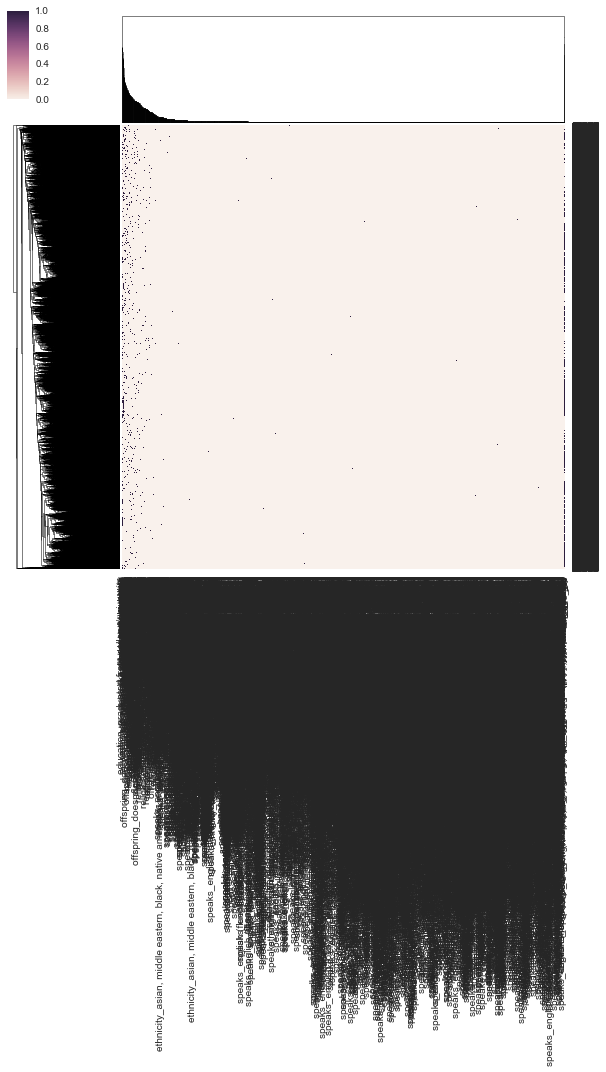

In [60]:
import seaborn as sns

g = sns.clustermap(profile_categorical_df)

# Visualize using Sparse PCA

In [27]:
pd.DataFrame({(5,2): 3, (5,1): 4}, index=[0,1])

5   
   1  2
0  4  3
1  4  3

In [ ]:
%%time

from sklearn.decomposition import SparsePCA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error



# param_grid = {'n_components': [1,2, 3, 5, 10, 20, 50, 100],
#              'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

param_grid = {'n_components': [5],
             'alpha': [1]}



kf = KFold(n_splits=5)

tried_params = []
tried_outputs = []

for n_components in param_grid['n_components']:
    for alpha in param_grid['alpha']:
        
        total_mean_absolute_error = 0
        
        for train_index, test_index in kf.split(profile_categorical_df.values):
            X_train = profile_categorical_df.values[train_index]
            X_test = profile_categorical_df.values[test_index]
        
        
        
        
            spca = SparsePCA(n_components=n_components,
                             alpha=alpha)

            spca.fit(X_train)
            X_test_pred = spca.transform(X_test)
            
            mae = mean_absolute_error(X_test, X_test_pred)
            
            total_mean_absolute_error += mae
            
           
        tried_params.append((n_components, alpha))
        tried_outputs.append(total_mean_absolute_error)
        
        


In [25]:
%%time

from sklearn.decomposition import SparsePCA
from sklearn.model_selection import GridSearchCV




param_grid = {'n_components': [3],
             'alpha': [1e-4]}

#param_grid = {'n_components': [1,2, 3, 5, 10, 20, 50, 100],
#             'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}


spca = GridSearchCV(SparsePCA(),
                   param_grid=param_grid,
                   cv=5, scoring='neg_mean_absolute_error')
spca = spca.fit(profile_categorical_df.values, profile_categorical_df.values)




AttributeError: 'SparsePCA' object has no attribute 'predict'

In [ ]:
# what sort of factors underly this categorical matrix?

# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html